In [1]:
import sys
sys.path.append('..')

In [34]:
from QCreator import transmission_line_simulator as tlsim
import numpy as np
import matplotlib.pyplot as plt

In [164]:
tls = tlsim.TLSystem()

num_periods = 10
discretization = 12
ll = 1.7e-11*1e6 # индуктивность единицы длины в Г/м
z0 = 50
cl = ll/(z0**2)
cl_amplitude = cl*0.5

lambda_6GHz = 1/(np.sqrt(cl*ll)*6e9)
l = 20e-6

node_id = 1

port1 = tlsim.Port(z0=50, name='1')
port2 = tlsim.Port(z0=50, name='2')

tls.add_element(port1, [1])

for period_id in range(num_periods):
    for point_id in range(discretization):
        f = tlsim.TLCoupler(n=1)
        f.Cl = [[cl + cl_amplitude*np.sin(point_id/discretization*2*np.pi)]]
        f.Ll = [[ll]]
        f.Rl = [[0]]
        f.Gl = [[0]]
        f.l = l
        
        tls.add_element(f, [node_id, node_id + 1])
        node_id += 1

tls.add_element(port2, [node_id])

In [165]:
def get_s21(sys, p1, p2, frequencies):
    """
    Use transmission line model to simulate S21(f) dependence
    :param p1: port1 name
    :param p2: port2 name
    :param frequencies: frequencies
    :return:
    """
    s = []
    for f_id, f in enumerate(frequencies):
        eq_vi, eq_dof = sys.get_element_dynamic_equations(p1)
        v2, i2, a2 = sys.get_element_dofs(p2)
        m = sys.create_boundary_problem_matrix(f * np.pi * 2)
        boundary = np.zeros(len(sys.dof_mapping))
        boundary[eq_vi] = 1
        s.append(np.linalg.lstsq(m, boundary)[0][a2[0]])

    return np.asarray(s)

In [166]:
f = np.linspace(1e8, 50e9, 501)
s21 = get_s21(tls, port1, port2, f)

<ipython-input-165-fffd3ceeaa28>:16: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  s.append(np.linalg.lstsq(m, boundary)[0][a2[0]])


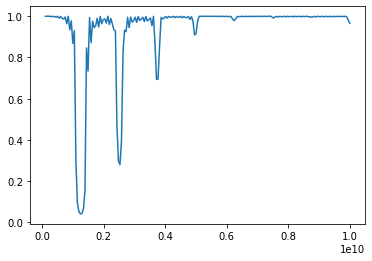

In [162]:
plt.plot(f, np.abs(s21))

In [131]:
m = tls.create_boundary_problem_matrix(1e10)

In [86]:
m

array([[ 1.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
         0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
         5.00000000e+01+0.j        ,  0.00000000e+00+0.j        ,
         0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
         0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
         0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
         0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
         0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ],
       [ 1.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
         0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
        -5.00000000e+01+0.j        ,  0.00000000e+00+0.j        ,
         0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
         0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
         1.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
         0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
         